In [ ]:
import pandas as pd
import imblearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("encode3_off.csv")
data.head()

,Unnamed: 0,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,1,76.54,0.490986,13,0,1
1,2,76.54,0.428038,14,0,0
2,4,76.54,0.143454,14,0,1
3,5,76.54,0.143454,14,0,1
4,10,76.54,0.055372,13,0,0


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,76.54,0.490986,13,0,1
1,76.54,0.428038,14,0,0
2,76.54,0.143454,14,0,1
3,76.54,0.143454,14,0,1
4,76.54,0.055372,13,0,0


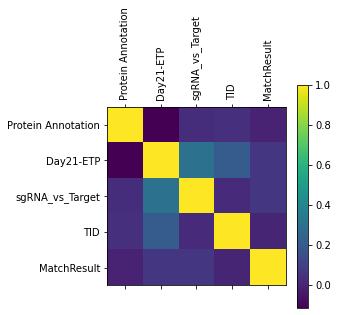

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(5), data.columns, rotation=90)
plt.yticks(np.arange(5), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
count = 0
test = pd.DataFrame()
train = pd.DataFrame()
for index, row in data.iterrows():
    count += 1
    if (count%3)==0:
        test = test.append(row)
    else:
        train = train.append(row)

In [ ]:
count = 0
test1 = pd.DataFrame()
train1 = pd.DataFrame()
for index, row in train.iterrows():
    count += 1
    if (count%3)==0:
        test1 = test1.append(row)
    else:
        train1 = train1.append(row)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15555 entries, 0 to 23331
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            15555 non-null  float64
 1   Day21-ETP           15555 non-null  float64
 2   MatchResult         15555 non-null  float64
 3   Protein Annotation  15555 non-null  float64
 4   TID                 15555 non-null  float64
dtypes: float64(5)
memory usage: 729.1 KB


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10370 entries, 0 to 23329
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            10370 non-null  float64
 1   Day21-ETP           10370 non-null  float64
 2   MatchResult         10370 non-null  float64
 3   Protein Annotation  10370 non-null  float64
 4   TID                 10370 non-null  float64
dtypes: float64(5)
memory usage: 486.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 2 to 23330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            7777 non-null   float64
 1   Day21-ETP           7777 non-null   float64
 2   MatchResult         7777 non-null   float64
 3   Protein Annotation  7777 non-null   float64
 4   TID                 7777 non-null   float64
dtypes: float64(5)
memory usage: 364.5 KB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5185 entries, 3 to 23331
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            5185 non-null   float64
 1   Day21-ETP           5185 non-null   float64
 2   MatchResult         5185 non-null   float64
 3   Protein Annotation  5185 non-null   float64
 4   TID                 5185 non-null   float64
dtypes: float64(5)
memory usage: 243.0 KB


In [ ]:
train.MatchResult.value_counts()

1.0    12412
0.0     3143
Name: MatchResult, dtype: int64

In [ ]:
train1.MatchResult.value_counts()

1.0    8257
0.0    2113
Name: MatchResult, dtype: int64

In [ ]:
test.MatchResult.value_counts()

1.0    6231
0.0    1546
Name: MatchResult, dtype: int64

In [ ]:
test1.MatchResult.value_counts()

1.0    4155
0.0    1030
Name: MatchResult, dtype: int64

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

Score:  0.004691116254025296
Weights:  [ 5.90611134e-03  1.25997905e-02 -5.07033511e-05 -1.57487034e-02]


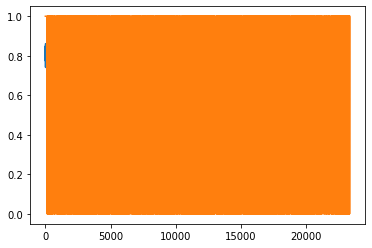

In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# **SVM (KERNEL: GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_gaussian))
print(classification_report(y_test,y_pred_m1_svm_gaussian))

[[   7 1023]
 [   5 4150]]
              precision    recall  f1-score   support

         0.0       0.58      0.01      0.01      1030
         1.0       0.80      1.00      0.89      4155

    accuracy                           0.80      5185
   macro avg       0.69      0.50      0.45      5185
weighted avg       0.76      0.80      0.72      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      7             |        1023               |   1030   |
|  Insertion (1)      |      5             |        4150              |   4155  |
|        TOTAL              |      12             |        5173             |   5185  |

In [ ]:
m1_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m1_svm_gaussian)

In [ ]:
M1_sp_SVM_gaussian=0.80
M1_se_SVM_gaussian=1.00
M1_acc_SVM_gaussian=0.80

In [ ]:
results = pd.DataFrame({'Classifier' : pd.Categorical(["SVM - Gaussian"]),
                        'Model' : pd.Categorical(["Imbalanced - Match"]),
                        'Specificity' : M1_sp_SVM_gaussian,
                        'Sensitivity' : M1_se_SVM_gaussian,
                        'Accuracy' : M1_acc_SVM_gaussian,
                        'AUC' : m1_svm_gaussian_auc})

**Model 2 - Manually Balanced**

In [ ]:
train1.MatchResult.value_counts()

1.0    8257
0.0    2113
Name: MatchResult, dtype: int64

In [ ]:
negative_cases = train1[train1['MatchResult'] == 0]
positive_cases = train1[train1['MatchResult'] == 1].sample(2113, random_state=0)
train1_balanced = pd.concat([positive_cases,negative_cases])
train1_balanced.sort_index(inplace=True)

X_train_bal = train1_balanced.drop(['MatchResult'], axis=1)
y_train_bal = train1_balanced['MatchResult']

train1_balanced.MatchResult.value_counts()

1.0    2113
0.0    2113
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_gaussian))
print(classification_report(y_test,y_pred_m2_svm_gaussian))

[[ 555  475]
 [2002 2153]]
              precision    recall  f1-score   support

         0.0       0.22      0.54      0.31      1030
         1.0       0.82      0.52      0.63      4155

    accuracy                           0.52      5185
   macro avg       0.52      0.53      0.47      5185
weighted avg       0.70      0.52      0.57      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      555             |        475               |   1030   |
|  Insertion (1)      |      2002             |        2153              |   4155  |
|        TOTAL              |      2557             |        2628             |   5185  |

In [ ]:
m2_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m2_svm_gaussian)

In [ ]:
M2_sp_SVM_gaussian=0.82
M2_se_SVM_gaussian=0.52
M2_acc_SVM_gaussian=0.52

In [ ]:
svm_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Gaussian", 'Specificity':M2_sp_SVM_gaussian, 'Sensitivity':M2_se_SVM_gaussian, 'Accuracy':M2_acc_SVM_gaussian, 'AUC': m2_svm_gaussian_auc}
results = results.append(svm_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_gaussian))
print(classification_report(y_test,y_pred_m3_svm_gaussian))

[[ 435  595]
 [1558 2597]]
              precision    recall  f1-score   support

         0.0       0.22      0.42      0.29      1030
         1.0       0.81      0.63      0.71      4155

    accuracy                           0.58      5185
   macro avg       0.52      0.52      0.50      5185
weighted avg       0.70      0.58      0.62      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      435             |        595               |   1030   |
|  Insertion (1)      |      1558             |        2597              |   4155  |
|        TOTAL              |      1993             |        3192             |   5185  |

In [ ]:
m3_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m3_svm_gaussian)

In [ ]:
M3_sp_SVM_gaussian=0.81
M3_se_SVM_gaussian=0.63
M3_acc_SVM_gaussian=0.58

In [ ]:
svm_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Gaussian", 'Specificity':M3_sp_SVM_gaussian, 'Sensitivity':M3_se_SVM_gaussian, 'Accuracy':M3_acc_SVM_gaussian, 'AUC': m3_svm_gaussian_auc}
results = results.append(svm_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
train1.MatchResult.value_counts()

1.0    8257
0.0    2113
Name: MatchResult, dtype: int64

In [ ]:
positive_cases = train1[train1['MatchResult'] == 1].sample(704, random_state=0)
negative_cases = train1[train1['MatchResult'] == 0].sample(1409, random_state=0)
train1_imbalanced = pd.concat([positive_cases,negative_cases])
train1_imbalanced.sort_index(inplace=True)

X_train_imbal = train1_imbalanced.drop(['MatchResult'], axis=1)
y_train_imbal = train1_imbalanced['MatchResult']
# AFTER
train1_imbalanced.MatchResult.value_counts()

0.0    1409
1.0     704
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_gaussian))
print(classification_report(y_test,y_pred_m4_svm_gaussian))

[[ 956   74]
 [3701  454]]
              precision    recall  f1-score   support

         0.0       0.21      0.93      0.34      1030
         1.0       0.86      0.11      0.19      4155

    accuracy                           0.27      5185
   macro avg       0.53      0.52      0.27      5185
weighted avg       0.73      0.27      0.22      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      956             |        74               |   1030   |
|  Insertion (1)      |      3701             |        454              |   4155  |
|        TOTAL              |      4657             |        528             |   5185  |

In [ ]:
m4_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m4_svm_gaussian)

In [ ]:
M4_sp_SVM_gaussian=0.86
M4_se_SVM_gaussian=0.11
M4_acc_SVM_gaussian=0.27

In [ ]:
svm_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Gaussian", 'Specificity':M4_sp_SVM_gaussian, 'Sensitivity':M4_se_SVM_gaussian, 'Accuracy':M4_acc_SVM_gaussian, 'AUC': m4_svm_gaussian_auc}
results = results.append(svm_gaussian_m4, ignore_index=True)

In [ ]:
results.tail()

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
0,SVM - Gaussian,Imbalanced - Match,0.80,1.00,0.80,0.502796
1,SVM - Gaussian,Balanced - Manual,0.82,0.52,0.52,0.528503
2,SVM - Gaussian,Balanced - SMOTE,0.81,0.63,0.58,0.523680
3,SVM - Gaussian,Imbalanced - Mismatch,0.86,0.11,0.27,0.518711


# **SVM (KERNEL: POLYNOMIAL)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_polynomial))
print(classification_report(y_test,y_pred_m1_svm_polynomial))

[[   0 1030]
 [   0 4155]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1030
         1.0       0.80      1.00      0.89      4155

    accuracy                           0.80      5185
   macro avg       0.40      0.50      0.44      5185
weighted avg       0.64      0.80      0.71      5185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      0             |        1030               |   1030   |
|  Insertion (1)      |      0             |        4155              |   4155  |
|        TOTAL              |      0             |        5185             |   5185  |

In [ ]:
m1_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m1_svm_polynomial)

In [ ]:
M1_sp_SVM_polynomial=0.80
M1_se_SVM_polynomial=1.00
M1_acc_SVM_polynomial=0.80

In [ ]:
svm_polynomial_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Polynomial", 'Specificity':M1_sp_SVM_polynomial, 'Sensitivity':M1_se_SVM_polynomial, 'Accuracy':M1_acc_SVM_polynomial, 'AUC': m1_svm_polynomial_auc}
results = results.append(svm_polynomial_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_polynomial))
print(classification_report(y_test,y_pred_m2_svm_polynomial))

[[ 858  172]
 [3284  871]]
              precision    recall  f1-score   support

         0.0       0.21      0.83      0.33      1030
         1.0       0.84      0.21      0.34      4155

    accuracy                           0.33      5185
   macro avg       0.52      0.52      0.33      5185
weighted avg       0.71      0.33      0.33      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      858             |        172               |   1030   |
|  Insertion (1)      |      3284             |        871              |   4155  |
|        TOTAL              |      4142             |        1043             |   5185  |

In [ ]:
m2_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m2_svm_polynomial)

In [ ]:
M2_sp_SVM_polynomial=0.84
M2_se_SVM_polynomial=0.21
M2_acc_SVM_polynomial=0.33

In [ ]:
svm_polynomial_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Polynomial", 'Specificity':M2_sp_SVM_polynomial, 'Sensitivity':M2_se_SVM_polynomial, 'Accuracy':M2_acc_SVM_polynomial, 'AUC': m2_svm_polynomial_auc}
results = results.append(svm_polynomial_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_polynomial))
print(classification_report(y_test,y_pred_m3_svm_polynomial))

[[ 827  203]
 [3138 1017]]
              precision    recall  f1-score   support

         0.0       0.21      0.80      0.33      1030
         1.0       0.83      0.24      0.38      4155

    accuracy                           0.36      5185
   macro avg       0.52      0.52      0.35      5185
weighted avg       0.71      0.36      0.37      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      827             |        203               |   1030   |
|  Insertion (1)      |      3138             |        1017              |   4155  |
|        TOTAL              |      3965             |        1220             |   5185  |

In [ ]:
m3_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m3_svm_polynomial)

In [ ]:
M3_sp_SVM_polynomial=0.83
M3_se_SVM_polynomial=0.24
M3_acc_SVM_polynomial=0.36

In [ ]:
svm_polynomial_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Polynomial", 'Specificity':M3_sp_SVM_polynomial, 'Sensitivity':M3_se_SVM_polynomial, 'Accuracy':M3_acc_SVM_polynomial, 'AUC': m3_svm_polynomial_auc}
results = results.append(svm_polynomial_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_polynomial))
print(classification_report(y_test,y_pred_m4_svm_polynomial))

[[1030    0]
 [4155    0]]
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33      1030
         1.0       0.00      0.00      0.00      4155

    accuracy                           0.20      5185
   macro avg       0.10      0.50      0.17      5185
weighted avg       0.04      0.20      0.07      5185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1030             |        0               |   1030   |
|  Insertion (1)      |      4155             |        0              |   4155  |
|        TOTAL              |      5185             |        0             |   5185  |

In [ ]:
m4_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m4_svm_polynomial)

In [ ]:
M4_sp_SVM_polynomial=0.00
M4_se_SVM_polynomial=0.00
M4_acc_SVM_polynomial=0.20

In [ ]:
svm_polynomial_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Polynomial", 'Specificity':M4_sp_SVM_polynomial, 'Sensitivity':M4_se_SVM_polynomial, 'Accuracy':M4_acc_SVM_polynomial, 'AUC': m4_svm_polynomial_auc}
results = results.append(svm_polynomial_m4, ignore_index=True)

# **SVM (KERNEL: SIGMOID)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_sigmoid))
print(classification_report(y_test,y_pred_m1_svm_sigmoid))

[[ 216  814]
 [ 839 3316]]
              precision    recall  f1-score   support

         0.0       0.20      0.21      0.21      1030
         1.0       0.80      0.80      0.80      4155

    accuracy                           0.68      5185
   macro avg       0.50      0.50      0.50      5185
weighted avg       0.68      0.68      0.68      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      216             |        814               |   1030   |
|  Insertion (1)      |      839             |        3316              |   4155  |
|        TOTAL              |      1055             |        4130             |   5185  |

In [ ]:
m1_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m1_svm_sigmoid)

In [ ]:
M1_sp_SVM_sigmoid=0.80
M1_se_SVM_sigmoid=0.80
M1_acc_SVM_sigmoid=0.68

In [ ]:
svm_sigmoid_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Sigmoid", 'Specificity':M1_sp_SVM_sigmoid, 'Sensitivity':M1_se_SVM_sigmoid, 'Accuracy':M1_acc_SVM_sigmoid, 'AUC': m1_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_sigmoid))
print(classification_report(y_test,y_pred_m2_svm_sigmoid))

[[ 509  521]
 [2032 2123]]
              precision    recall  f1-score   support

         0.0       0.20      0.49      0.29      1030
         1.0       0.80      0.51      0.62      4155

    accuracy                           0.51      5185
   macro avg       0.50      0.50      0.45      5185
weighted avg       0.68      0.51      0.56      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      509             |        521               |   1030   |
|  Insertion (1)      |      2032             |        2123              |   4155  |
|        TOTAL              |      2541             |        2644             |   5185  |

In [ ]:
m2_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m2_svm_sigmoid)

In [ ]:
M2_sp_SVM_sigmoid=0.80
M2_se_SVM_sigmoid=0.51
M2_acc_SVM_sigmoid=0.51

In [ ]:
svm_sigmoid_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Sigmoid", 'Specificity':M2_sp_SVM_sigmoid, 'Sensitivity':M2_se_SVM_sigmoid, 'Accuracy':M2_acc_SVM_sigmoid, 'AUC': m2_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_sigmoid))
print(classification_report(y_test,y_pred_m3_svm_sigmoid))

[[ 513  517]
 [2065 2090]]
              precision    recall  f1-score   support

         0.0       0.20      0.50      0.28      1030
         1.0       0.80      0.50      0.62      4155

    accuracy                           0.50      5185
   macro avg       0.50      0.50      0.45      5185
weighted avg       0.68      0.50      0.55      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      513             |        517               |   1030   |
|  Insertion (1)      |      2065             |        2090              |   4155  |
|        TOTAL              |      2578             |        2607             |   5185  |

In [ ]:
m3_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m3_svm_sigmoid)

In [ ]:
M3_sp_SVM_sigmoid=0.80
M3_se_SVM_sigmoid=0.50
M3_acc_SVM_sigmoid=0.50

In [ ]:
svm_sigmoid_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Sigmoid", 'Specificity':M3_sp_SVM_sigmoid, 'Sensitivity':M3_se_SVM_sigmoid, 'Accuracy':M3_acc_SVM_sigmoid, 'AUC': m3_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_sigmoid))
print(classification_report(y_test,y_pred_m4_svm_sigmoid))

[[ 682  348]
 [2743 1412]]
              precision    recall  f1-score   support

         0.0       0.20      0.66      0.31      1030
         1.0       0.80      0.34      0.48      4155

    accuracy                           0.40      5185
   macro avg       0.50      0.50      0.39      5185
weighted avg       0.68      0.40      0.44      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      682             |        348               |   1030   |
|  Insertion (1)      |      2743             |        1412              |   4155  |
|        TOTAL              |      3425             |        1760             |   5185  |

In [ ]:
m4_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m4_svm_sigmoid)

In [ ]:
M4_sp_SVM_sigmoid=0.80
M4_se_SVM_sigmoid=0.34
M4_acc_SVM_sigmoid=0.40

In [ ]:
svm_sigmoid_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Sigmoid", 'Specificity':M4_sp_SVM_sigmoid, 'Sensitivity':M4_se_SVM_sigmoid, 'Accuracy':M4_acc_SVM_sigmoid, 'AUC': m4_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m4, ignore_index=True)

# **NAIVE BAYES (GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_gaussian))
print(classification_report(y_test,y_pred_m1_naive_gaussian))

[[   0 1030]
 [   0 4155]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1030
         1.0       0.80      1.00      0.89      4155

    accuracy                           0.80      5185
   macro avg       0.40      0.50      0.44      5185
weighted avg       0.64      0.80      0.71      5185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      0             |        1030               |   1030   |
|  Insertion (1)      |      0             |        4155              |   4155  |
|        TOTAL              |      0             |        5185             |   5185  |

In [ ]:
m1_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m1_naive_gaussian)

In [ ]:
M1_sp_naive_gaussian=0.80
M1_se_naive_gaussian=1.00
M1_acc_naive_gaussian=0.80

In [ ]:
naive_gaussian_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M1_sp_naive_gaussian, 'Sensitivity':M1_se_naive_gaussian, 'Accuracy':M1_acc_naive_gaussian, 'AUC': m1_naive_gaussian_auc}
results = results.append(naive_gaussian_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_gaussian))
print(classification_report(y_test,y_pred_m2_naive_gaussian))

[[ 636  394]
 [2391 1764]]
              precision    recall  f1-score   support

         0.0       0.21      0.62      0.31      1030
         1.0       0.82      0.42      0.56      4155

    accuracy                           0.46      5185
   macro avg       0.51      0.52      0.44      5185
weighted avg       0.70      0.46      0.51      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      636             |        394               |   1030   |
|  Insertion (1)      |      2391             |        1764              |   4155  |
|        TOTAL              |      3027             |        2158             |   5185  |

In [ ]:
m2_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m2_naive_gaussian)

In [ ]:
M2_sp_naive_gaussian=0.82
M2_se_naive_gaussian=0.42
M2_acc_naive_gaussian=0.46

In [ ]:
naive_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M2_sp_naive_gaussian, 'Sensitivity':M2_se_naive_gaussian, 'Accuracy':M2_acc_naive_gaussian, 'AUC': m2_naive_gaussian_auc}
results = results.append(naive_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_gaussian))
print(classification_report(y_test,y_pred_m3_naive_gaussian))

[[ 649  381]
 [2414 1741]]
              precision    recall  f1-score   support

         0.0       0.21      0.63      0.32      1030
         1.0       0.82      0.42      0.55      4155

    accuracy                           0.46      5185
   macro avg       0.52      0.52      0.44      5185
weighted avg       0.70      0.46      0.51      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      649             |        381               |   1030   |
|  Insertion (1)      |      2414             |        1741              |   4155  |
|        TOTAL              |           3063        |        2122             |   5185  |

In [ ]:
m3_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m3_naive_gaussian)

In [ ]:
M3_sp_naive_gaussian=0.82
M3_se_naive_gaussian=0.42
M3_acc_naive_gaussian=0.46

In [ ]:
naive_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M3_sp_naive_gaussian, 'Sensitivity':M3_se_naive_gaussian, 'Accuracy':M3_acc_naive_gaussian, 'AUC': m3_naive_gaussian_auc}
results = results.append(naive_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = GaussianNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_gaussian))
print(classification_report(y_test,y_pred_m4_naive_gaussian))

[[ 980   50]
 [3682  473]]
              precision    recall  f1-score   support

         0.0       0.21      0.95      0.34      1030
         1.0       0.90      0.11      0.20      4155

    accuracy                           0.28      5185
   macro avg       0.56      0.53      0.27      5185
weighted avg       0.77      0.28      0.23      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      980             |        50               |   1030   |
|  Insertion (1)      |      3682             |        473              |   4155  |
|        TOTAL              |      4662             |        523             |   5185  |

In [ ]:
m4_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m4_naive_gaussian)

In [ ]:
M4_sp_naive_gaussian=0.90
M4_se_naive_gaussian=0.11
M4_acc_naive_gaussian=0.28

In [ ]:
naive_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M4_sp_naive_gaussian, 'Sensitivity':M4_se_naive_gaussian, 'Accuracy':M4_acc_naive_gaussian, 'AUC': m4_naive_gaussian_auc}
results = results.append(naive_gaussian_m4, ignore_index=True)

# **Naive Bayes (Bernoulli)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_bernoulli))
print(classification_report(y_test,y_pred_m1_naive_bernoulli))

[[   1 1029]
 [   0 4155]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      1030
         1.0       0.80      1.00      0.89      4155

    accuracy                           0.80      5185
   macro avg       0.90      0.50      0.45      5185
weighted avg       0.84      0.80      0.71      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1             |        1029               |   1030   |
|  Insertion (1)      |      0             |        4155              |   4155  |
|        TOTAL              |      1             |        5184             |   5185  |

In [ ]:
m1_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m1_naive_bernoulli)

In [ ]:
M1_sp_naive_bernoulli=0.80
M1_se_naive_bernoulli=1.00
M1_acc_naive_bernoulli=0.80

In [ ]:
naive_bernoullii_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M1_sp_naive_bernoulli, 'Sensitivity':M1_se_naive_bernoulli, 'Accuracy':M1_acc_naive_bernoulli, 'AUC':m1_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_bernoulli))
print(classification_report(y_test,y_pred_m2_naive_bernoulli))

[[ 876  154]
 [3325  830]]
              precision    recall  f1-score   support

         0.0       0.21      0.85      0.33      1030
         1.0       0.84      0.20      0.32      4155

    accuracy                           0.33      5185
   macro avg       0.53      0.53      0.33      5185
weighted avg       0.72      0.33      0.33      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      876             |        154               |   1030   |
|  Insertion (1)      |      3325             |        830              |   4155  |
|        TOTAL              |      4201             |        984             |   5185  |

In [ ]:
m2_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m2_naive_bernoulli)

In [ ]:
M2_sp_naive_bernoulli=0.84
M2_se_naive_bernoulli=0.20
M2_acc_naive_bernoulli=0.33

In [ ]:
naive_bernoullii_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M2_sp_naive_bernoulli, 'Sensitivity':M2_se_naive_bernoulli, 'Accuracy':M2_acc_naive_bernoulli, 'AUC':m2_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_bernoulli))
print(classification_report(y_test,y_pred_m3_naive_bernoulli))

[[ 598  432]
 [2185 1970]]
              precision    recall  f1-score   support

         0.0       0.21      0.58      0.31      1030
         1.0       0.82      0.47      0.60      4155

    accuracy                           0.50      5185
   macro avg       0.52      0.53      0.46      5185
weighted avg       0.70      0.50      0.54      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      598             |        432               |   1030   |
|  Insertion (1)      |      2185             |        1970              |   4155  |
|        TOTAL              |      2783             |        2402             |   5185  |

In [ ]:
m3_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m3_naive_bernoulli)

In [ ]:
M3_sp_naive_bernoulli=0.82
M3_se_naive_bernoulli=0.47
M3_acc_naive_bernoulli=0.50

In [ ]:
naive_bernoullii_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M3_sp_naive_bernoulli, 'Sensitivity':M3_se_naive_bernoulli, 'Accuracy':M3_acc_naive_bernoulli, 'AUC':m3_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = BernoulliNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_bernoulli))
print(classification_report(y_test,y_pred_m4_naive_bernoulli))

[[1030    0]
 [4155    0]]
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33      1030
         1.0       0.00      0.00      0.00      4155

    accuracy                           0.20      5185
   macro avg       0.10      0.50      0.17      5185
weighted avg       0.04      0.20      0.07      5185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1030             |        0               |   1030   |
|  Insertion (1)      |      4155             |        0              |   4155  |
|        TOTAL              |      5185             |        0             |   5185  |

In [ ]:
m4_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m4_naive_bernoulli)

In [ ]:
M4_sp_naive_bernoulli=0.00
M4_se_naive_bernoulli=0.00
M4_acc_naive_bernoulli=0.20

In [ ]:
naive_bernoullii_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M4_sp_naive_bernoulli, 'Sensitivity':M4_se_naive_bernoulli, 'Accuracy':M4_acc_naive_bernoulli, 'AUC':m4_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m4, ignore_index=True)

# **Random Forest**



**Model 1 - Imbalanced towards Match**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m1_rf))
print(classification_report(y_test,y_pred_m1_rf))

[[ 346  684]
 [ 225 3930]]
              precision    recall  f1-score   support

         0.0       0.61      0.34      0.43      1030
         1.0       0.85      0.95      0.90      4155

    accuracy                           0.82      5185
   macro avg       0.73      0.64      0.66      5185
weighted avg       0.80      0.82      0.80      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      346             |        684               |   1030   |
|  Insertion (1)      |      225             |        3930              |   4155  |
|        TOTAL              |      571             |        4614             |   5185  |

In [ ]:
m1_rf_auc = roc_auc_score(y_test, y_pred_m1_rf)

In [ ]:
M1_sp_rf=0.85
M1_se_rf=0.95
M1_acc_rf=0.82

In [ ]:
rf_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Random Forest", 'Specificity':M1_sp_rf, 'Sensitivity':M1_se_rf, 'Accuracy':M1_acc_rf, 'AUC':m1_rf_auc}
results = results.append(rf_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m2_rf))
print(classification_report(y_test,y_pred_m2_rf))

[[ 677  353]
 [1888 2267]]
              precision    recall  f1-score   support

         0.0       0.26      0.66      0.38      1030
         1.0       0.87      0.55      0.67      4155

    accuracy                           0.57      5185
   macro avg       0.56      0.60      0.52      5185
weighted avg       0.75      0.57      0.61      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      677             |        353               |   1030   |
|  Insertion (1)      |      1888             |        2267              |   4155  |
|        TOTAL              |      2565             |        2620             |   5185  |

In [ ]:
m2_rf_auc = roc_auc_score(y_test, y_pred_m2_rf)

In [ ]:
M2_sp_rf=0.87
M2_se_rf=0.55
M2_acc_rf=0.57

In [ ]:
rf_m2 = {'Model':"Balanced - Manual", 'Classifier':"Random Forest", 'Specificity':M2_sp_rf, 'Sensitivity':M2_se_rf, 'Accuracy':M2_acc_rf, 'AUC':m2_rf_auc}
results = results.append(rf_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m3_rf))
print(classification_report(y_test,y_pred_m3_rf))

[[ 401  629]
 [ 564 3591]]
              precision    recall  f1-score   support

         0.0       0.42      0.39      0.40      1030
         1.0       0.85      0.86      0.86      4155

    accuracy                           0.77      5185
   macro avg       0.63      0.63      0.63      5185
weighted avg       0.76      0.77      0.77      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      401             |        629               |   1030   |
|  Insertion (1)      |      564             |        3591              |   4155  |
|        TOTAL              |      965             |        4220             |   5185  |

In [ ]:
m3_rf_auc = roc_auc_score(y_test, y_pred_m3_rf)

In [ ]:
M3_sp_rf=0.85
M3_se_rf=0.86
M3_acc_rf=0.77

In [ ]:
rf_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Random Forest", 'Specificity':M3_sp_rf, 'Sensitivity':M3_se_rf, 'Accuracy':M3_acc_rf, 'AUC':m3_rf_auc}
results = results.append(rf_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
rf = RandomForestClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m4_rf))
print(classification_report(y_test,y_pred_m4_rf))

[[ 882  148]
 [3118 1037]]
              precision    recall  f1-score   support

         0.0       0.22      0.86      0.35      1030
         1.0       0.88      0.25      0.39      4155

    accuracy                           0.37      5185
   macro avg       0.55      0.55      0.37      5185
weighted avg       0.75      0.37      0.38      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      882             |        148               |   1030   |
|  Insertion (1)      |      3118             |        1037              |   4155  |
|        TOTAL              |      4000             |        1185             |   5185  |

In [ ]:
m4_rf_auc = roc_auc_score(y_test, y_pred_m4_rf)

In [ ]:
M4_sp_rf=0.88
M4_se_rf=0.25
M4_acc_rf=0.37

In [ ]:
rf_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Random Forest", 'Specificity':M4_sp_rf, 'Sensitivity':M4_se_rf, 'Accuracy':M4_acc_rf, 'AUC':m4_rf_auc}
results = results.append(rf_m4, ignore_index=True)

# **LightGBM**

**Model 1 - Imbalanced towards Match**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_lgb))
print(classification_report(y_test,y_pred_m1_lgb))

[[  26 1004]
 [  23 4132]]
              precision    recall  f1-score   support

         0.0       0.53      0.03      0.05      1030
         1.0       0.80      0.99      0.89      4155

    accuracy                           0.80      5185
   macro avg       0.67      0.51      0.47      5185
weighted avg       0.75      0.80      0.72      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      26             |        1004               |   1030   |
|  Insertion (1)      |      23             |        4132              |   4155  |
|        TOTAL              |      49             |        5136             |   5185  |

In [ ]:
m1_lgb_auc = roc_auc_score(y_test, y_pred_m1_lgb)

In [ ]:
M1_sp_lgb=0.80
M1_se_lgb=0.99
M1_acc_lgb=0.80

In [ ]:
lgb_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Light GBM", 'Specificity':M1_sp_lgb, 'Sensitivity':M1_se_lgb, 'Accuracy':M1_acc_lgb, 'AUC':m1_lgb_auc}
results = results.append(lgb_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_lgb))
print(classification_report(y_test,y_pred_m2_lgb))

[[ 598  432]
 [1946 2209]]
              precision    recall  f1-score   support

         0.0       0.24      0.58      0.33      1030
         1.0       0.84      0.53      0.65      4155

    accuracy                           0.54      5185
   macro avg       0.54      0.56      0.49      5185
weighted avg       0.72      0.54      0.59      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      598             |        432               |   1030   |
|  Insertion (1)      |      1946             |        2209              |   4155  |
|        TOTAL              |      2544             |        2641             |   5185  |

In [ ]:
m2_lgb_auc = roc_auc_score(y_test, y_pred_m2_lgb)

In [ ]:
M2_sp_lgb=0.84
M2_se_lgb=0.53
M2_acc_lgb=0.54

In [ ]:
lgb_m2 = {'Model':"Balanced - Manual", 'Classifier':"Light GBM", 'Specificity':M2_sp_lgb, 'Sensitivity':M2_se_lgb, 'Accuracy':M2_acc_lgb, 'AUC':m2_lgb_auc}
results = results.append(lgb_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_lgb))
print(classification_report(y_test,y_pred_m3_lgb))

[[  92  938]
 [ 162 3993]]
              precision    recall  f1-score   support

         0.0       0.36      0.09      0.14      1030
         1.0       0.81      0.96      0.88      4155

    accuracy                           0.79      5185
   macro avg       0.59      0.53      0.51      5185
weighted avg       0.72      0.79      0.73      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      92             |        938              |   1030   |
|  Insertion (1)      |      162             |        3993              |   4155  |
|        TOTAL              |      254             |        4931             |   5185  |

In [ ]:
m3_lgb_auc = roc_auc_score(y_test, y_pred_m3_lgb)

In [ ]:
M3_sp_lgb=0.81
M3_se_lgb=0.96
M3_acc_lgb=0.79

In [ ]:
lgb_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Light GBM", 'Specificity':M3_sp_lgb, 'Sensitivity':M3_se_lgb, 'Accuracy':M3_acc_lgb, 'AUC':m3_lgb_auc}
results = results.append(lgb_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_lgb))
print(classification_report(y_test,y_pred_m4_lgb))

[[ 901  129]
 [3280  875]]
              precision    recall  f1-score   support

         0.0       0.22      0.87      0.35      1030
         1.0       0.87      0.21      0.34      4155

    accuracy                           0.34      5185
   macro avg       0.54      0.54      0.34      5185
weighted avg       0.74      0.34      0.34      5185



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      901             |        129               |   1030   |
|  Insertion (1)      |      3280             |        875              |   4155  |
|        TOTAL              |      4181             |        1004             |   5185  |

In [ ]:
m4_lgb_auc = roc_auc_score(y_test, y_pred_m4_lgb)

In [ ]:
M4_sp_lgb=0.87
M4_se_lgb=0.21
M4_acc_lgb=0.34

In [ ]:
lgb_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Light GBM", 'Specificity':M4_sp_lgb, 'Sensitivity':M4_se_lgb, 'Accuracy':M4_acc_lgb, 'AUC': m4_lgb_auc}
results = results.append(lgb_m4, ignore_index=True)

In [ ]:
#results.drop(results.tail(3).index,inplace=True)
results

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
0,SVM - Gaussian,Imbalanced - Match,0.80,1.00,0.80,0.502796
1,SVM - Gaussian,Balanced - Manual,0.82,0.52,0.52,0.528503
2,SVM - Gaussian,Balanced - SMOTE,0.81,0.63,0.58,0.523680
3,SVM - Gaussian,Imbalanced - Mismatch,0.86,0.11,0.27,0.518711
4,SVM - Polynomial,Imbalanced - Match,0.80,1.00,0.80,0.500000
5,SVM - Polynomial,Balanced - Manual,0.84,0.21,0.33,0.521318
6,SVM - Polynomial,Balanced - SMOTE,0.83,0.24,0.36,0.523839
7,SVM - Polynomial,Imbalanced - Mismatch,0.00,0.00,0.20,0.500000
8,SVM - Sigmoid,Imbalanced - Match,0.80,0.80,0.68,0.503892
9,SVM - Sigmoid,Balanced - Manual,0.80,0.51,0.51,0.502563


In [ ]:
results.sort_values('AUC').tail(10)

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
1,SVM - Gaussian,Balanced - Manual,0.82,0.52,0.52,0.528503
15,Naive Bayes - Gaussian,Imbalanced - Mismatch,0.90,0.11,0.28,0.532648
27,Light GBM,Imbalanced - Mismatch,0.87,0.21,0.34,0.542673
23,Random Forest,Imbalanced - Mismatch,0.88,0.25,0.37,0.552945
25,Light GBM,Balanced - Manual,0.84,0.53,0.54,0.556116
21,Random Forest,Balanced - Manual,0.87,0.55,0.57,0.601445
22,Random Forest,Balanced - SMOTE,0.85,0.86,0.77,0.626790
20,Random Forest,Imbalanced - Match,0.85,0.95,0.82,0.640885


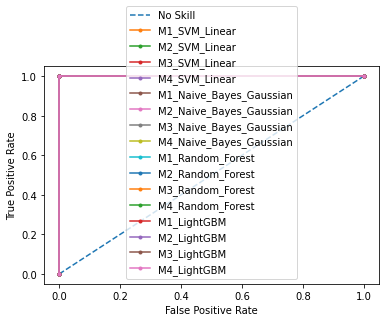

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m1_svm_linear_fpr, m1_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m1_svm_linear)
m2_svm_linear_fpr, m2_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m2_svm_linear)
m3_svm_linear_fpr, m3_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m3_svm_linear)
m4_svm_linear_fpr, m4_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m4_svm_linear)
m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m1_naive_gaussian)
m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m2_naive_gaussian)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m4_naive_gaussian)
m1_rf_fpr, m1_rf_tpr, _ = roc_curve(y_test, y_pred_m1_rf)
m2_rf_fpr, m2_rf_tpr, _ = roc_curve(y_test, y_pred_m2_rf)
m3_rf_fpr, m3_rf_tpr, _ = roc_curve(y_test, y_pred_m3_rf)
m4_rf_fpr, m4_rf_tpr, _ = roc_curve(y_test, y_pred_m4_rf)
m1_lgb_fpr, m1_lgb_tpr, _ = roc_curve(y_test, y_pred_m1_lgb)
m2_lgb_fpr, m2_lgb_tpr, _ = roc_curve(y_test, y_pred_m2_lgb)
m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m4_lgb_fpr, m4_lgb_tpr, _ = roc_curve(y_test, y_pred_m4_lgb)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m1_svm_linear_fpr, m1_svm_linear_tpr, marker='.', label='M1_SVM_Linear')
pyplot.plot(m2_svm_linear_fpr, m2_svm_linear_tpr, marker='.', label='M2_SVM_Linear')
pyplot.plot(m3_svm_linear_fpr, m3_svm_linear_tpr, marker='.', label='M3_SVM_Linear')
pyplot.plot(m4_svm_linear_fpr, m4_svm_linear_tpr, marker='.', label='M4_SVM_Linear')
pyplot.plot(m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, marker='.', label='M1_Naive_Bayes_Gaussian')
pyplot.plot(m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, marker='.', label='M2_Naive_Bayes_Gaussian')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3_Naive_Bayes_Gaussian')
pyplot.plot(m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, marker='.', label='M4_Naive_Bayes_Gaussian')
pyplot.plot(m1_rf_fpr, m1_rf_tpr, marker='.', label='M1_Random_Forest')
pyplot.plot(m2_rf_fpr, m2_rf_tpr, marker='.', label='M2_Random_Forest')
pyplot.plot(m3_rf_fpr, m3_rf_tpr, marker='.', label='M3_Random_Forest')
pyplot.plot(m4_rf_fpr, m4_rf_tpr, marker='.', label='M4_Random_Forest')
pyplot.plot(m1_lgb_fpr, m1_lgb_tpr, marker='.', label='M1_LightGBM')
pyplot.plot(m2_lgb_fpr, m2_lgb_tpr, marker='.', label='M2_LightGBM')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3_LightGBM')
pyplot.plot(m4_lgb_fpr, m4_lgb_tpr, marker='.', label='M4_LightGBM')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()